 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [31]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
whale_portfolio=pd.read_csv('whale_returns.csv',index_col='Date',keep_default_na=False,parse_dates=['Date'],infer_datetime_format=True)
whale_portfolio['SOROS LLC']=  pd.to_numeric(whale_portfolio['SOROS LLC'],errors='coerce')
whale_portfolio.head()

,SOROS LLC,PAULSON INC,TIGER LLC,BERKSHIRE HATHAWAY
Date,,,,
2015-03-02,NaN,,,
2015-03-03,-0.001266,-0.004980519330323507,-0.0004955323147710633,-0.006568669777734182
2015-03-04,0.002230,0.003241280460949403,-0.002533976773233637,0.004213019161491749
2015-03-05,0.004016,0.004076052738837932,0.002354656751653028,0.006726329822673627
2015-03-06,-0.007905,-0.003574033706685631,-0.008481173398287467,-0.013098061052771559


In [15]:
whale_portfolio['PAULSON INC']=  pd.to_numeric(whale_portfolio['PAULSON INC'],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOROS LLC           1059 non-null   float64
 1   PAULSON INC         1059 non-null   float64
 2   TIGER LLC           1060 non-null   object 
 3   BERKSHIRE HATHAWAY  1060 non-null   object 
dtypes: float64(2), object(2)
memory usage: 41.4+ KB


In [16]:
whale_portfolio['TIGER LLC']=  pd.to_numeric(whale_portfolio['TIGER LLC'],errors='coerce')

In [17]:
whale_portfolio['BERKSHIRE HATHAWAY']=  pd.to_numeric(whale_portfolio['BERKSHIRE HATHAWAY'],errors='coerce')

In [20]:
# Drop nulls
whale_portfolio.dropna(inplace=True)
whale_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOROS LLC           1059 non-null   float64
 1   PAULSON INC         1059 non-null   float64
 2   TIGER LLC           1059 non-null   float64
 3   BERKSHIRE HATHAWAY  1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [33]:
# Reading algorithmic returns
algo_portfolio=pd.read_csv('algo_returns.csv',index_col='Date',keep_default_na=False,parse_dates=True,infer_datetime_format=True)
algo_portfolio['Algo 2']=  pd.to_numeric(algo_portfolio['Algo 2'],errors='coerce')

In [34]:
# Count nulls
algo_portfolio.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [35]:
# Drop nulls
algo_portfolio.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [109]:
# Reading S&P 500 Closing Prices
sp500_close=pd.read_csv('sp500_history.csv',index_col='Date',keep_default_na=False,parse_dates=True,infer_datetime_format=True)
sp500_close.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [110]:
# Check Data Types
sp500_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [120]:
# Fix Data Types
sp500_close.replace(to_replace='\$',value="",regex=True,inplace=True)
sp500_close['Close'] = pd.to_numeric(sp500_close['Close'])
sp500_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [121]:
# Calculate Daily Returns
sp500pct=sp500_close.pct_change()

In [124]:
# Drop nulls
sp500pct.isnull().sum()
sp500pct.dropna(inplace=True)

In [125]:
# Rename `Close` Column to be specific to this portfolio.
sp500pct.columns=['SP500']
sp500pct.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [133]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinedreturns=pd.concat([whale_portfolio,algo_portfolio,sp500pct],axis=1,join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

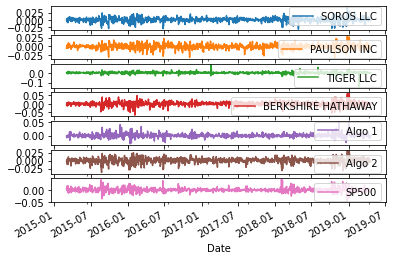

In [134]:
# Plot daily returns of all portfolios

combinedreturns.plot(subplots=True)



#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

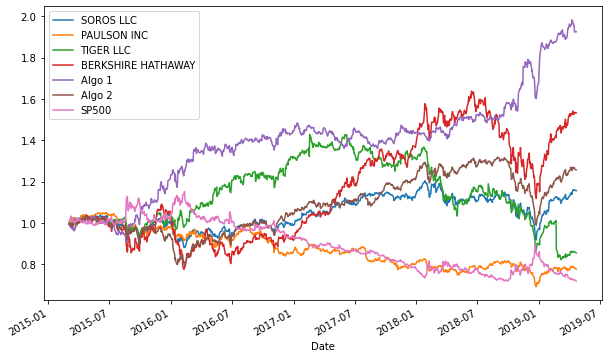

In [135]:
# Calculate cumulative returns of all portfolios
cumulativereturns = (1 + combinedreturns).cumprod()
# Plot cumulative returns
cumulativereturns.plot(figsize=(10,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

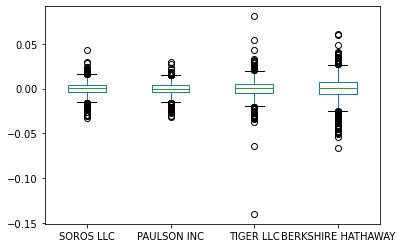

In [136]:
# Box plot to visually show risk
whale_portfolio.plot(kind="box")

<AxesSubplot:>

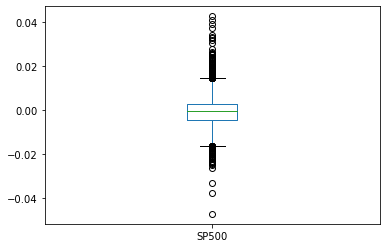

In [137]:
sp500pct.plot(kind='box')

<AxesSubplot:>

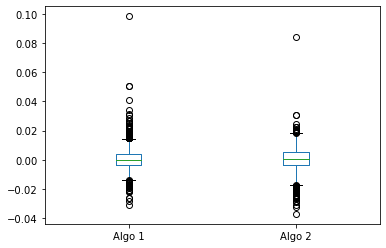

In [138]:
algo_portfolio.plot(kind='box')

### Calculate Standard Deviations

In [139]:
# Calculate the daily standard deviations of all portfolios
combinedreturns.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY    0.012919
TIGER LLC             0.010897
SP500                 0.008587
Algo 2                0.008341
SOROS LLC             0.007896
Algo 1                0.007623
PAULSON INC           0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [140]:
# Calculate  the daily standard deviation of S&P 500
sp500pct.std()

SP500    0.008135
dtype: float64

##### Determine which portfolios are riskier than the S&P 500
* With the Sp500 standard deviation being .008135. The portfolios that are riskier are Tiger LLC(.010824), Berkshire Hathoway(.012831), and the Algo 2(.008466) trading bot.

### Calculate the Annualized Standard Deviation

In [142]:
# Calculate the annualized standard deviation (252 trading days)
annualizedstd = combinedreturns.std() * np.sqrt(252)
annualizedstd

SOROS LLC             0.125348
PAULSON INC           0.111527
TIGER LLC             0.172989
BERKSHIRE HATHAWAY    0.205079
Algo 1                0.121006
Algo 2                0.132413
SP500                 0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

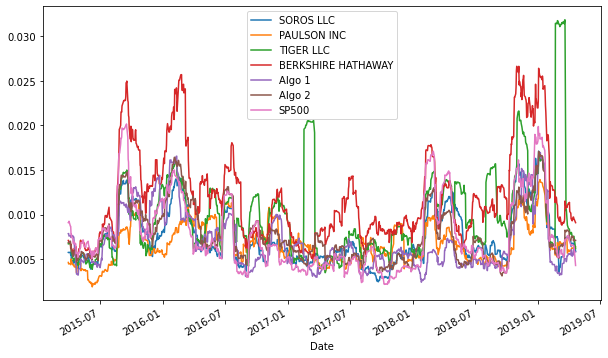

In [169]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingstd=combinedreturns.rolling(window=21).std().dropna()
# Plot the rolling standard deviation
rollingstd.plot(figsize=(10,6))

### Calculate and plot the correlation

<AxesSubplot:>

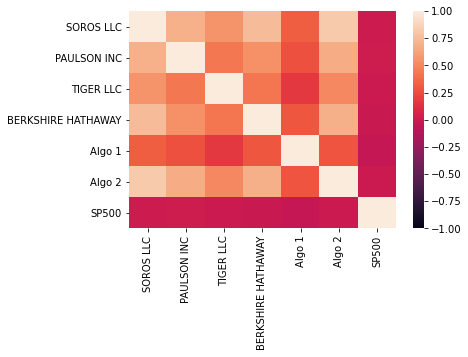

In [168]:
# Calculate the correlation
combinedcorr=combinedreturns.corr()
# Display de correlation matrix
sns.heatmap(combinedcorr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

The covariance of Berkshire Hathaway is -1.5371091324717376e-06
The varaince of the SP 500 is 7.373467552840441e-05
the beta of Berkshire Hathaway vs the SP500 is -0.0208464894089024


<AxesSubplot:xlabel='Date'>

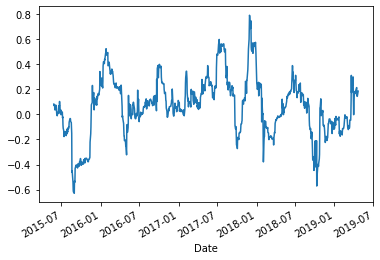

In [178]:
# Calculate covariance of a single portfolio
covariance = combinedreturns['BERKSHIRE HATHAWAY'].cov(combinedreturns['SP500'])
print(f'The covariance of Berkshire Hathaway is {covariance}')
# Calculate variance of S&P 500
variance = combinedreturns['SP500'].var()
print(f'The varaince of the SP 500 is {variance}')
# Computing beta
bkbeta = covariance / variance
print(f'the beta of Berkshire Hathaway vs the SP500 is {bkbeta}')
# Plot beta trend
rolling_c = combinedreturns['BERKSHIRE HATHAWAY'].rolling(window=60).cov(combinedreturns['SP500'])
rolling_v = combinedreturns['SP500'].rolling(window=60).var()
rolling_b=rolling_c / rolling_v
rolling_b.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [193]:
# Annualized Sharpe Ratios
# risk free rate not available so calculation may be wrong
sharpe_ratio = (combinedreturns.mean() * 252) / (combinedreturns.std() * np.sqrt(252))

<AxesSubplot:>

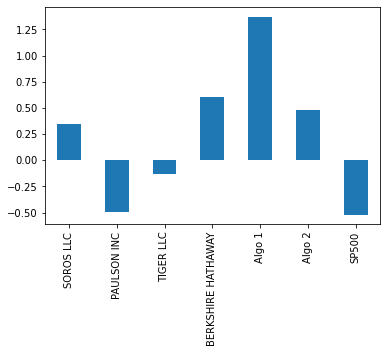

In [194]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!